In [1]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import googletrans
import matplotlib.pyplot as plt;plt.rcdefaults()
import numpy as np

In [81]:
pip install googletrans==4.0.0-rc1


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r"C:\Users\Parth\OneDrive\Documents\amazon.csv", thousands='.', encoding='ISO-8859-1')


In [3]:
df


,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [4]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [5]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [6]:
df.shape

(6454, 5)

In [7]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [8]:
df.isna()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [9]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [10]:
df = df.replace(0, np.nan)

In [11]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,NaN,1998-01-01
1,1999,Acre,Janeiro,NaN,1999-01-01
2,2000,Acre,Janeiro,NaN,2000-01-01
3,2001,Acre,Janeiro,NaN,2001-01-01
4,2002,Acre,Janeiro,NaN,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [12]:
df2 = df.dropna(subset=['number'])
df2

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [13]:
df2.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [14]:
forest_fire_per_month = df2.groupby('month')['number'].sum()
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [15]:
months_unique = list(df.month.unique())
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [16]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique,axis = 0)
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [17]:
print(forest_fire_per_month)

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64


In [18]:
forest_fire_per_month = forest_fire_per_month .to_frame()
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [19]:
forest_fire_per_month.reset_index(level=0,inplace = True)
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [23]:
translator = googletrans.Translator()
for months in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

NameError: name 'month' is not defined

In [24]:
translator2= googletrans.Translator()
for i,m in enumerate(forest_fire_per_month['month']):
    translated = translater2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i,'month'] = month1

NameError: name 'translater2' is not defined

In [25]:
print(forest_fire_per_month)

        month     number
0     Janeiro    52587.0
1   Fevereiro    30952.0
2       Março    35118.0
3       Abril    28364.0
4        Maio    46083.0
5       Junho   111405.0
6       Julho   217620.0
7      Agosto   740841.0
8    Setembro  1015925.0
9     Outubro   629665.0
10   Novembro   312326.0
11   Dezembro   152596.0


AttributeError: 'function' object has no attribute 'get_yticklabels'

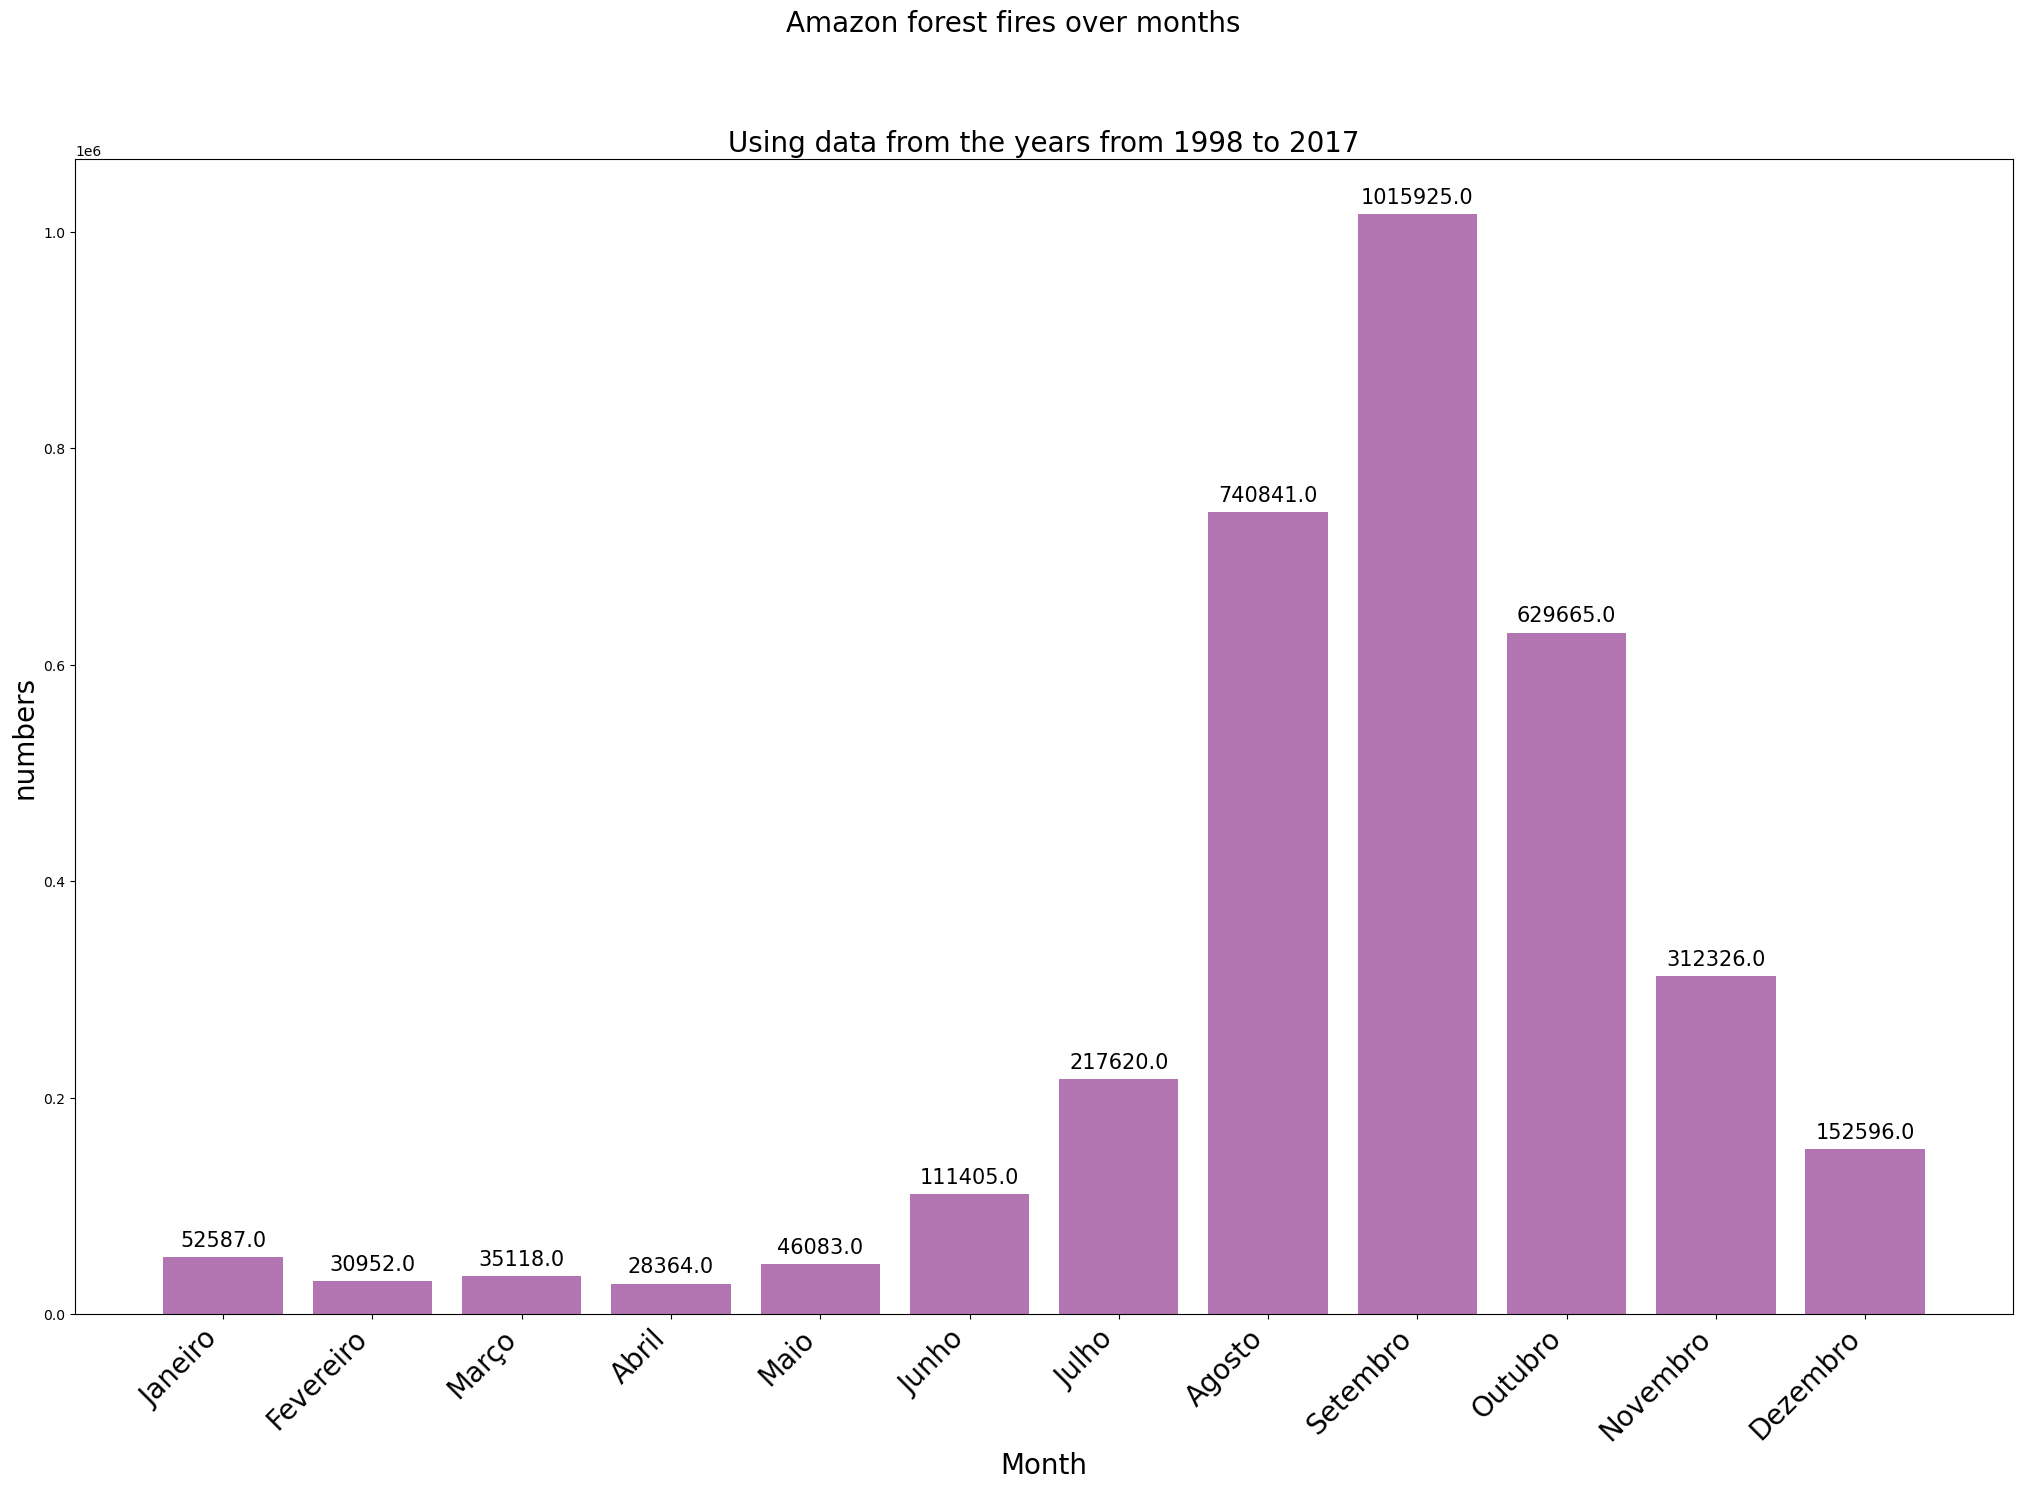

In [30]:
plt.figure(figsize=(25, 15))

plt.bar(
    forest_fire_per_month['month'],
    forest_fire_per_month['number'],
    color = (0.5,0.1,0.5,0.6)
)

plt.suptitle('Amazon forest fires over months', fontsize = 20)
plt.title('Using data from the years from 1998 to 2017', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('numbers', fontsize = 20)

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
    i,
    num+10000,
    num,
    ha='center',
    fontsize=15)
plt.setp(plt.gca().get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
        fontsize=20)
plt.setp(plt.gca.get_yticklabels(),fontsize=20)